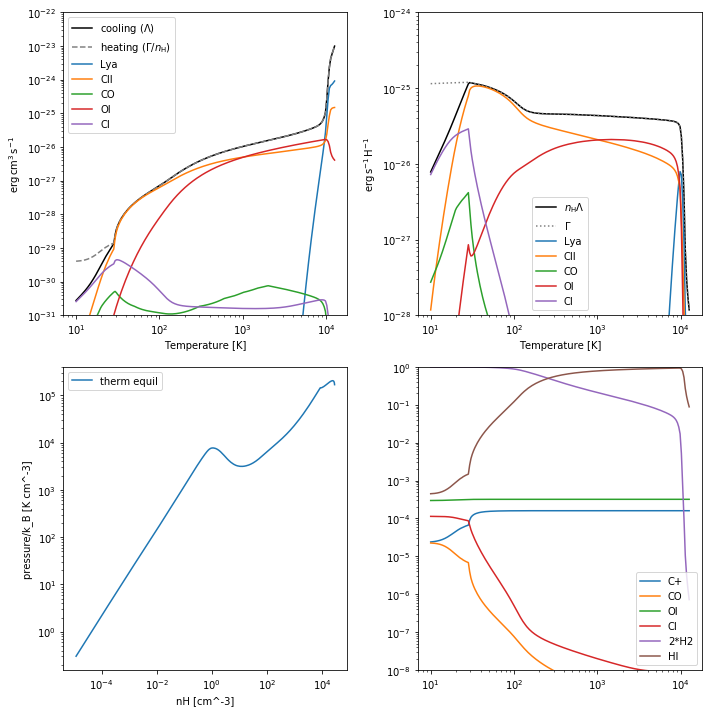

In [4]:
import cool_tigress as ct

Tmin = 10.0
Tmax = 1e1**4.1
Z = 1.0
xi_CR = 2e-16
G0 = 1.0
G_PE = G0 ; G_CI = G0 ; G_CO = 1.0 ; G_H2 = 0.0

T = np.logspace(np.log10(Tmin), np.log10(Tmax), num=200)
c = ct.CoolTigress(T=T, Z=Z, xi_CR=xi_CR,
                   G_PE=G_PE, G_CI=G_CI, G_CO=G_CO, G_H2=G_H2, equil=True)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

plt.sca(axes[0])
plt.loglog(c.T, c.cooling, c='k', label=r'cooling ($\Lambda$)')
plt.loglog(c.T, c.heating, c='grey', ls='--', label=r'heating ($\Gamma/n_{\rm H}$)')
plt.loglog(c.T, c.get_coolingLya()/c.nH, label=r'Lya')
plt.loglog(c.T, c.get_coolingCII()/c.nH, label=r'CII')
plt.loglog(c.T, c.get_coolingCO()/c.nH, label=r'CO')
plt.loglog(c.T, c.get_coolingOI()/c.nH, label=r'OI')
plt.loglog(c.T, c.get_coolingCI()/c.nH, label=r'CI')
plt.xlabel('Temperature [K]')
plt.ylabel(r'${\rm erg}\,{\rm cm}^{3}\,{\rm s}^{-1}$')
plt.legend()
plt.ylim(bottom=1e-31, top=1e-22)

plt.sca(axes[1])
plt.loglog(c.T, c.Lambda*c.nH, c='k', label=r'$n_{\rm H}\Lambda$')
plt.loglog(c.T, c.Gamma, c='grey', ls=':', label=r'$\Gamma$')
plt.loglog(c.T, c.get_coolingLya(), label=r'Lya')
plt.loglog(c.T, c.get_coolingCII(), label=r'CII')
plt.loglog(c.T, c.get_coolingCO(), label=r'CO')
plt.loglog(c.T, c.get_coolingOI(), label=r'OI')
plt.loglog(c.T, c.get_coolingCI(), label=r'CI')
plt.xlabel('Temperature [K]')
plt.ylabel(r'${\rm erg}\,{\rm s}^{-1}\,{\rm H}^{-1}$')
plt.legend()
#ylim = plt.gca().get_ylim()
plt.ylim(1e-28, 1e-24)

plt.sca(axes[2])
plt.loglog(c.nH, c.pok, label='therm equil')
plt.xlabel('nH [cm^-3]')
plt.ylabel('pressure/k_B [K cm^-3]')
plt.legend()

plt.sca(axes[3])
plt.loglog(c.T, c.x_Cplus, label='C+')
plt.loglog(c.T, c.x_CO, label='CO')
plt.loglog(c.T, c.x_OI, label='OI')
plt.loglog(c.T, c.x_CI, label='CI')
plt.loglog(c.T, 2.0*c.x_H2, label='2*H2')
plt.loglog(c.T, c.x_HI, label='HI')
plt.legend()
plt.ylim(1e-8,1.0)

plt.tight_layout()

# How heating/cooling varies with nH at a fixed temperature

* For fiducial parameters, equilibrium nH does not exist at low T < ~30K and at high T > ~12000K


* Also true for other values of G0

Text(0.5, 0.98, 'G_PE=G_CI=G_CO=1, G_H2=0')

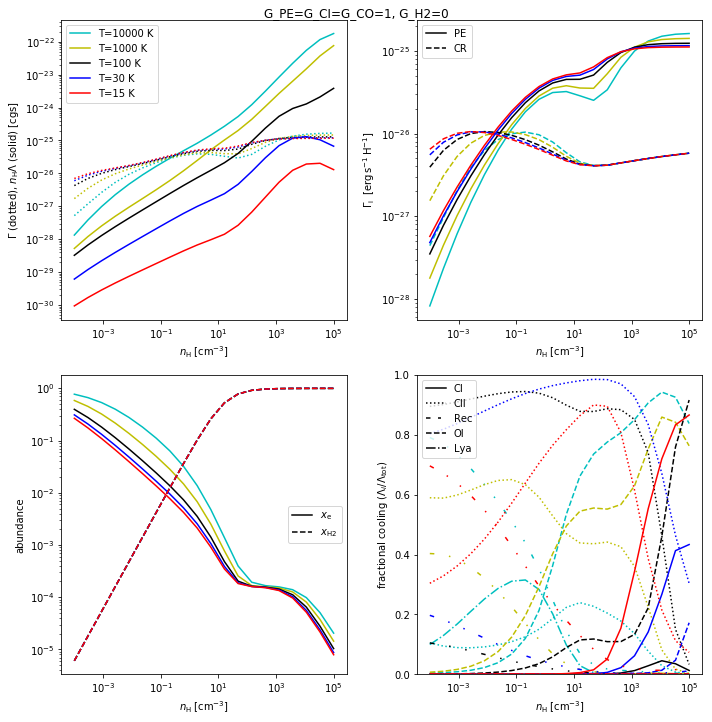

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
nH = np.logspace(-4.0, 5.0, num=20)
G0 = 1.0
G_H2 = 0.0
def plt_heating_cooling(T=100.0, color='k'):
    c = ct.CoolTigress(nH=nH, T=T, G_PE=G0, G_CI=G0, G_CO=G0, G_H2=G_H2, equil=False)
    plt.sca(axes[0])
    plt.loglog(c.nH, c.cooling*c.nH, c=color, ls='-', label='T={0:g} K'.format(T))
    plt.loglog(c.nH, c.heating*c.nH, c=color, ls=':')
    plt.sca(axes[1])
#     plt.loglog(c.nH, c.get_heatingPE()/(c.heating*c.nH), c=color, ls='-')
#     plt.loglog(c.nH, c.get_heatingCR()/(c.heating*c.nH), c=color, ls='--')
    plt.loglog(c.nH, c.get_heatingPE(), c=color, ls='-')
    plt.loglog(c.nH, c.get_heatingCR(), c=color, ls='--')
    plt.sca(axes[2])
    plt.loglog(c.nH, c.x_e, c=color, ls='-')
    plt.loglog(c.nH, 2*c.x_H2, c=color, ls='--')
    plt.sca(axes[3])
    plt.loglog(c.nH, c.get_coolingCI()/(c.cooling*c.nH), c=color, ls='-')
    plt.loglog(c.nH, c.get_coolingCII()/(c.cooling*c.nH), c=color, ls=':')
    plt.loglog(c.nH, c.get_coolingRec()/(c.cooling*c.nH), c=color,
               ls=(0, (3, 10, 1, 10, 1, 10)))
    plt.loglog(c.nH, c.get_coolingOI()/(c.cooling*c.nH), c=color, ls='--')
    plt.loglog(c.nH, c.get_coolingLya()/(c.cooling*c.nH), c=color, ls='-.')

plt_heating_cooling(T=1e4, color='c')
plt_heating_cooling(T=1e3, color='y')
plt_heating_cooling(T=100.0, color='k')
plt_heating_cooling(T=30.0, color='b')
plt_heating_cooling(T=15.0, color='r')

plt.sca(axes[0])
plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
plt.ylabel(r'$\Gamma$ (dotted), $n_{\rm H}\Lambda$ (solid) [cgs]')
plt.legend()
plt.sca(axes[1])
plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
plt.ylabel(r'$\Gamma_{\rm i}\;\;[{\rm erg}\,{\rm s}^{-1}\,{\rm H}^{-1}]$')
plt.legend([mpl.lines.Line2D([0], [0], ls='-', c='k'),
            mpl.lines.Line2D([0], [0], ls='--', c='k')],
           ['PE','CR'])
plt.sca(axes[2])
plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
plt.ylabel(r'abundance')
plt.legend([mpl.lines.Line2D([0], [0], ls='-', c='k'),
            mpl.lines.Line2D([0], [0], ls='--', c='k')],
           [r'$x_{\rm e}$',r'$x_{\rm H2}$'])
plt.sca(axes[3])
plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
plt.ylabel(r'fractional cooling ($\Lambda_i/\Lambda_{\rm tot}$)')
plt.legend([mpl.lines.Line2D([0], [0], ls='-', c='k'),
            mpl.lines.Line2D([0], [0], ls=':', c='k'),
            mpl.lines.Line2D([0], [0], ls=(0, (3, 5, 2, 5, 2, 5)), c='k'),
            mpl.lines.Line2D([0], [0], ls='--', c='k'),
            mpl.lines.Line2D([0], [0], ls='-.', c='k')],
           ['CI', 'CII', 'Rec', 'OI', 'Lya'], loc=2)
plt.ylim(0.0, 1e0)
plt.yscale('linear')
plt.tight_layout()
plt.suptitle('G_PE=G_CI=G_CO={0:g}, G_H2={1:g}'.format(G0, G_H2), va='bottom', ha='center')

# Hot gas cooling rate

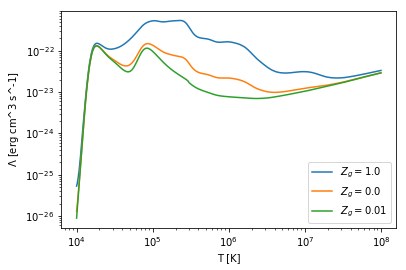

In [12]:
import cool_tigress as ct

T = np.logspace(4, 8, num=1000)
plt.loglog(T, ct.coolingHot(T, Z_g=1.0), label=r'$Z_g=1.0$')
plt.loglog(T, ct.coolingHot(T, Z_g=0.1), label=r'$Z_g=0.0$')
plt.loglog(T, ct.coolingHot(T, Z_g=0.01), label=r'$Z_g=0.01$')
plt.xlabel('T [K]')
plt.ylabel(r'$\Lambda$ [erg cm^3 s^-1]')
plt.legend()